---
# Dataset Analysis

Joao Parreira - 2221985
Pedro Barbeiro - 2221986
- ((2221985 + 2221986) % 5) + 1 = 2  
- **Validation set: train2**. 

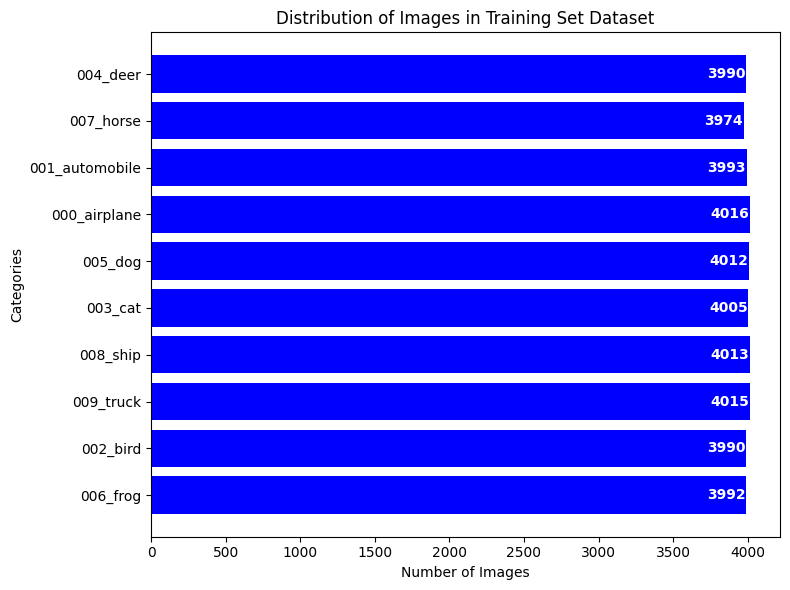

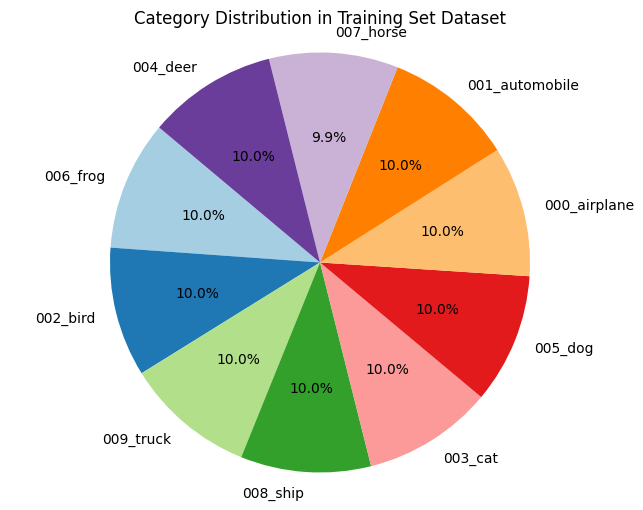

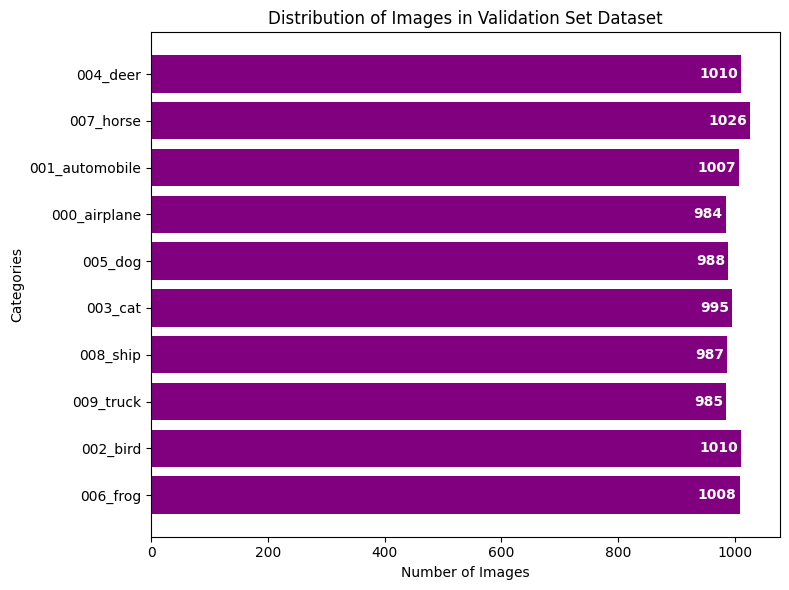

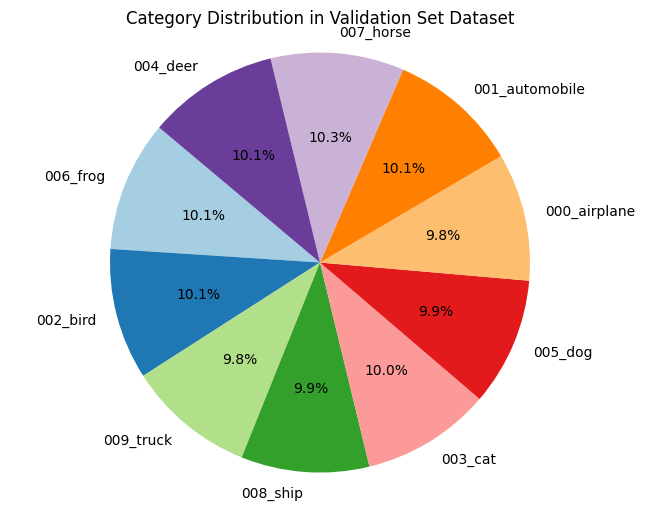

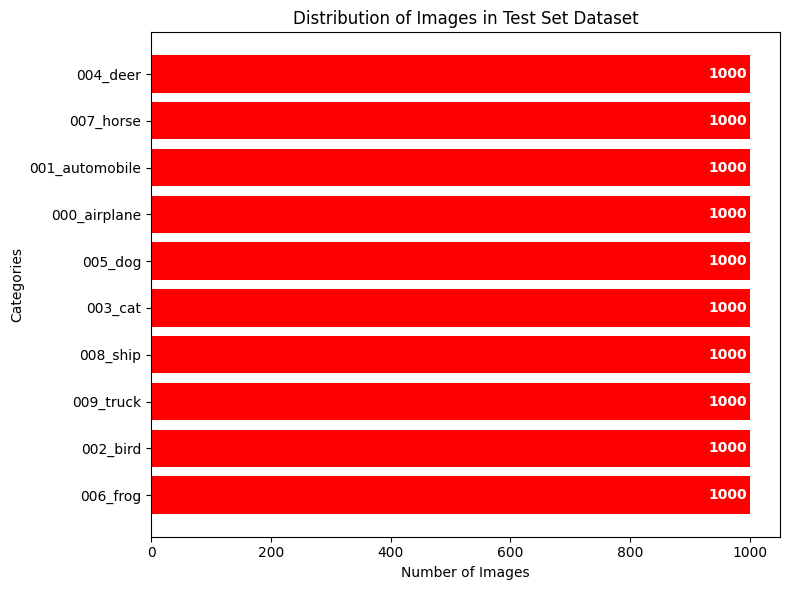

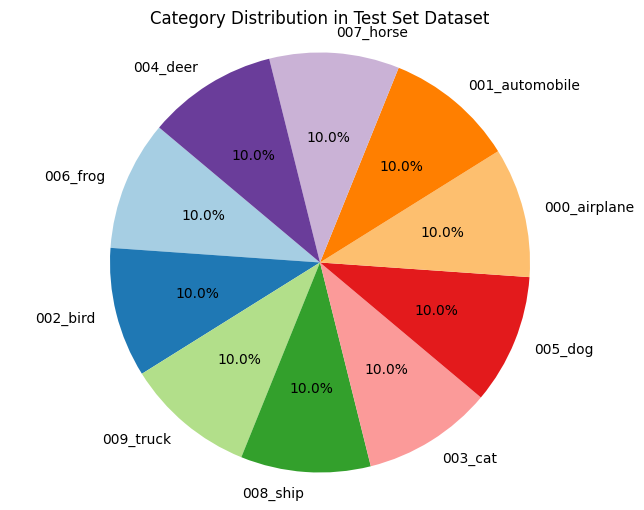

In [2]:
import os
import matplotlib.pyplot as plt

train_dirs = ['../data/train1', '../data/train3', '../data/train4', '../data/train5']
validation_dir = '../data/train2'
test_dir = '../data/test'

def count_images_in_categories(directory):
    categories = os.listdir(directory)
    category_counts = {}
    for category in categories:
        category_counts[category] = len(os.listdir(os.path.join(directory, category)))
    return category_counts

train_counts_each_dir = [count_images_in_categories(train_dir) for train_dir in train_dirs]
validation_counts = count_images_in_categories(validation_dir)
test_counts = count_images_in_categories(test_dir)
train_counts = {category: sum([count.get(category, 0) for count in train_counts_each_dir]) for category in train_counts_each_dir[0]}

def plot_statistics(dataset_name, category_counts, color):
    categories = list(category_counts.keys())
    counts = list(category_counts.values())
    num_categories = len(categories)

    plt.figure(figsize=(8, 6))
    bars = plt.barh(range(num_categories), counts, color=color, alpha=1)
    for bar, count in zip(bars, counts):
        plt.text(bar.get_width() - 5, bar.get_y() + bar.get_height()/2, str(count), va='center', ha='right', color='white', fontweight='bold')
    plt.ylabel('Categories')
    plt.xlabel('Number of Images')
    plt.yticks(range(num_categories), categories)
    plt.title(f'Distribution of Images in {dataset_name} Dataset')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.pie(counts, labels=categories, colors=plt.cm.Paired(range(num_categories)), autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title(f'Category Distribution in {dataset_name} Dataset')
    plt.show()

plot_statistics('Training Set', train_counts, 'blue')
plot_statistics('Validation Set', validation_counts, 'purple')
plot_statistics('Test Set', test_counts, 'red')